In [2]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import statistics

In [3]:
print("By Victor Chen")

By Victor Chen


## Note

`cv.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

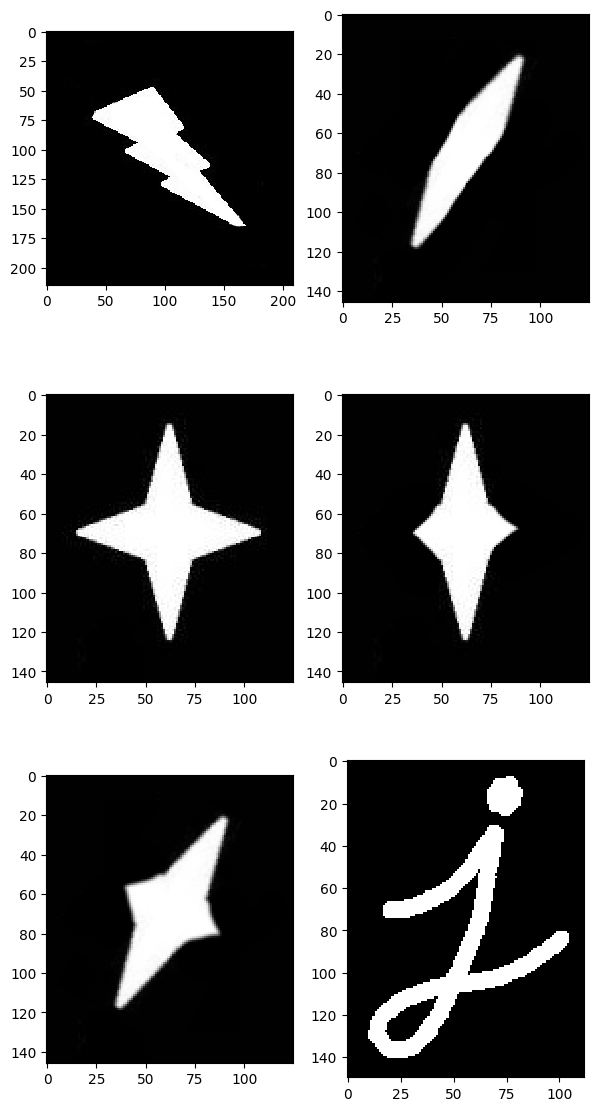

In [3]:
lightningbolt      = cv.imread('shapes/lightningbolt.png', cv.IMREAD_GRAYSCALE)
blob               = cv.imread('shapes/blob.png', cv.IMREAD_GRAYSCALE)
star               = cv.imread('shapes/star.png', cv.IMREAD_GRAYSCALE)
squishedstar       = cv.imread('shapes/squishedstar.png', cv.IMREAD_GRAYSCALE)
squishedturnedstar = cv.imread('shapes/squishedturnedstar.png', cv.IMREAD_GRAYSCALE)
letterj            = cv.imread('shapes/letterj.png', cv.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [22]:
# lightningbolt is a 2D array with each pixel only takes one uint8 value (gray scaled).

intensity_values = set(lightningbolt.flatten()) # This explains why we can use flatten here.
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

Visually, I expect the answer to be $2$, as it seems that there only exist black and white in this image. The actual value might be due to the pixels on the edge that are between the black and white regions. As these pixels could be affected by both sides of the image, these pixel values are thus not completely equal to $0$ or $255$.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


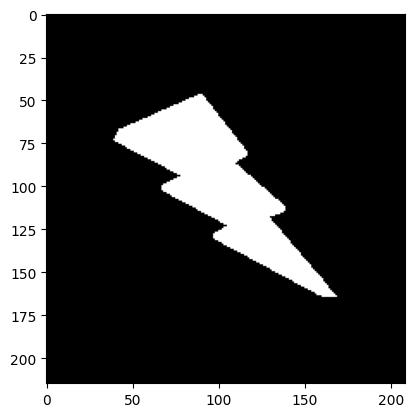

In [27]:
# Binary thresholding extremplifies all values to either 0 or 255.
_, lightningbolt = cv.threshold(lightningbolt,200,255,cv.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values)) # Now only contains 0 and 255.

# intensity_values
plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

If the above values (too high) are used for the thresholding, there will be more information being omitted. This can effectively further reduce the noise within the data, but it's also potentially causing the loss of data. A good value for thresholding should be balancing these two effects and make the outcome to have the best effect.

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

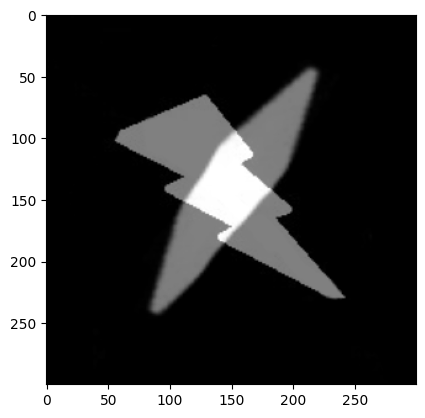

In [52]:
# Blending two images together
fig, ax = plt.subplots()

# Read the images to avoid direct overwrite.
img1 = lightningbolt
img2 = blob

# Resize both images to 300x300 to they are of the same size.
img1 = cv.resize(img1, (300, 300), interpolation=cv.INTER_LINEAR)
img2 = cv.resize(img2, (300, 300), interpolation=cv.INTER_LINEAR)

# Blend both images together.
blend_image = cv.addWeighted(img1, 0.5, img2, 0.5, 0)

# Display the blended image.
ax.imshow(blend_image, cmap="gray")

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

In [1]:
# Finding the Region of Interest
# TODO

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

<class 'numpy.float64'>


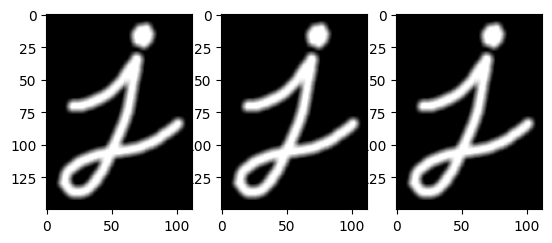

In [21]:
# Using the averaging kernel.
fig, ax = plt.subplots(ncols=3)

# Read the image to avoid overwrite the original image.
img = cv.imread("shapes/letterj.png", cv.IMREAD_GRAYSCALE)

# Apply the kernel to the image.
kernel = np.ones((5, 5), np.float32)/25
img_16f = cv.filter2D(img, -1, kernel) # The ddepth is about the information stored in each pixel.
img_32f = cv.filter2D(img, cv.CV_32F, kernel)
img_64f = cv.filter2D(img, cv.CV_64F, kernel)

# Print the outcome.
ax[0].imshow(img_16f, cmap="gray")
ax[1].imshow(img_32f, cmap="gray")
ax[2].imshow(img_64f, cmap="gray")

print(type(img_64f[0,0]))

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

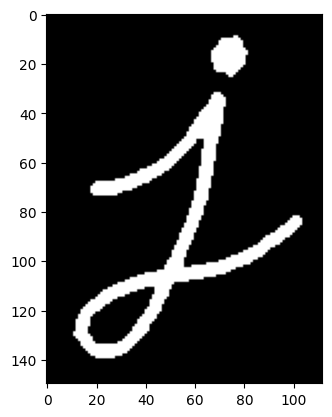

In [34]:
# Erosion on letterj with 3x3 kernel.
fig, ax = plt.subplots()

# Read the image to prevent overwrite the original information.
img = cv.imread("shapes/letterj.png", cv.IMREAD_GRAYSCALE)

# Perform the erosion operation.
kernel = np.ones((3, 3), dtype=np.uint8)
img = cv.erode(img, kernel, iterations=1)

# Display the edited version of the photo.
ax.imshow(img, cmap="gray")

## 5. Perform erosion on j with a 5x5 kernel

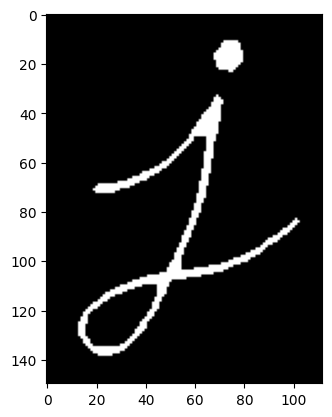

In [35]:
# Erosion on letterj with 5x5 kernel.
fig, ax = plt.subplots()

# Read the image to prevent overwrite the original information.
img = cv.imread("shapes/letterj.png", cv.IMREAD_GRAYSCALE)

# Perform the erosion operation.
kernel = np.ones((5, 5), dtype=np.uint8)
img = cv.erode(img, kernel, iterations=1)

# Display the edited version of the photo.
ax.imshow(img, cmap="gray")

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



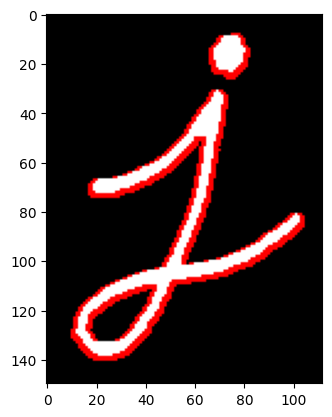

In [14]:
# Erosion on letterj with 5x5 kernel.
fig, ax = plt.subplots()

# Read the image to prevent overwrite the original information.
img = cv.imread("shapes/letterj.png", cv.IMREAD_GRAYSCALE)

# Perform the erosion operation.
kernel = np.ones((3, 3), dtype=np.uint8)
kernel[0, :] = 0 # Interesting to notice that the value is depend on the sum of the surronding values based on kernel.

reg_img = cv.erode(img, kernel, iterations=2)

dsp = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

dsp[:, :, 1] = cv.bitwise_and(img, img, mask=reg_img)
dsp[:, :, 2] = cv.bitwise_and(img, img, mask=reg_img)

# Display the edited version of the photo.
ax.imshow(dsp)

## 7. Perform dilation on j with a 3x3 kernel

In [47]:
# 7
# TODO

## 8. Perform dilation on j with a 5x5 kernel

In [48]:
# 8
# TODO

## 9. What is the effect of kernel size on morphology operations?

In [49]:
# 9
# TODO

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [50]:
# 10
# TODO

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

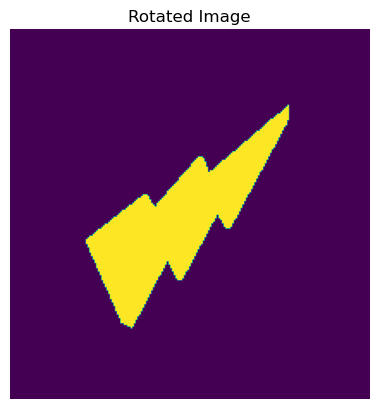

In [64]:
rows, cols = lightningbolt.shape[:2]
M = cv.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 